In [171]:
___Author___='LumberJack Jyss'

In [172]:
print('Global Optimized LumberJack Equities Method\n°OoO_FOREX_Oo0°\nLumberJack Jyss 5779(c)')

Global Optimized LumberJack Equities Method
°OoO_FOREX_Oo0°
LumberJack Jyss 5779(c)


In [173]:
print('Importing librairies...')
import numpy as np
import pandas as pd
import talib
from zigzag import *
import matplotlib.pyplot as plt
import seaborn as sns
import os
print('Librairies imported')

Importing librairies...
Librairies imported


In [174]:
import warnings
warnings.filterwarnings("ignore")

In [175]:
start = '2017-02-16'
end = '2019-05-28'

In [176]:
df = pd.read_csv('SPX_weekly_10Y.csv')
df = df.iloc[1:,1:-1]

In [177]:
df.shape

(521, 5)

In [178]:
df.head()

Date    Open    High     Low   Close
1  20090612  934.79  956.25  926.39  946.22
2  20090619  938.65  938.82  903.74  920.78
3  20090626  913.35  922.06  888.79  918.08
4  20090702  920.91  931.90  897.22  897.54
5  20090710  891.05  898.67  869.30  878.74

In [179]:
df.tail()

Date     Open     High      Low    Close
517  20190503  2940.58  2954.13  2900.50  2945.64
518  20190510  2908.89  2937.32  2825.39  2881.40
519  20190517  2840.19  2892.15  2801.43  2859.53
520  20190524  2841.94  2868.88  2805.49  2826.06
521  20190531  2830.03  2840.51  2750.52  2752.06

In [180]:
delta = round(df.shape[0])
bloc1 = round(delta*0.8)
bloc2 = delta - bloc1
print("Période d'étude : ",delta)
print('Sur un découpage 80% - 20% de la période : ')
print('Bloc 1 : ',bloc1,' jours \nBloc 2 :',bloc2,' jours')

Période d'étude :  521
Sur un découpage 80% - 20% de la période : 
Bloc 1 :  417  jours 
Bloc 2 : 104  jours


In [181]:
dataset_1W = df.copy()

In [182]:
rsi = talib.RSI(dataset_1W['Close'],timeperiod=14)
upper, middle, lower =  talib.BBANDS(dataset_1W['Close'], timeperiod=9, nbdevup=2, nbdevdn=2,matype=0)
sma5 = talib.SMA(dataset_1W['Close'],timeperiod=5)
sma8 = talib.SMA(dataset_1W['Close'],timeperiod=8)
sma10 = talib.SMA(dataset_1W['Close'],timeperiod=10)
sma12 = talib.SMA(dataset_1W['Close'],timeperiod=12)
sma15 = talib.SMA(dataset_1W['Close'],timeperiod=15)
sma30 = talib.SMA(dataset_1W['Close'],timeperiod=30)
sma35 = talib.SMA(dataset_1W['Close'],timeperiod=35)
sma40 = talib.SMA(dataset_1W['Close'],timeperiod=40)
sma45 = talib.SMA(dataset_1W['Close'],timeperiod=45)
sma50 = talib.SMA(dataset_1W['Close'],timeperiod=50)

delta5_8 = sma5 - sma8
delta8_10 = sma8 - sma10
delta10_12 = sma10 - sma12
delta12_15 = sma12 - sma15
delta15_30 = sma15 - sma30
delta30_35 = sma30 - sma35
delta35_40 = sma35 - sma40
delta40_45 = sma40 - sma45
delta45_50 = sma45 - sma50

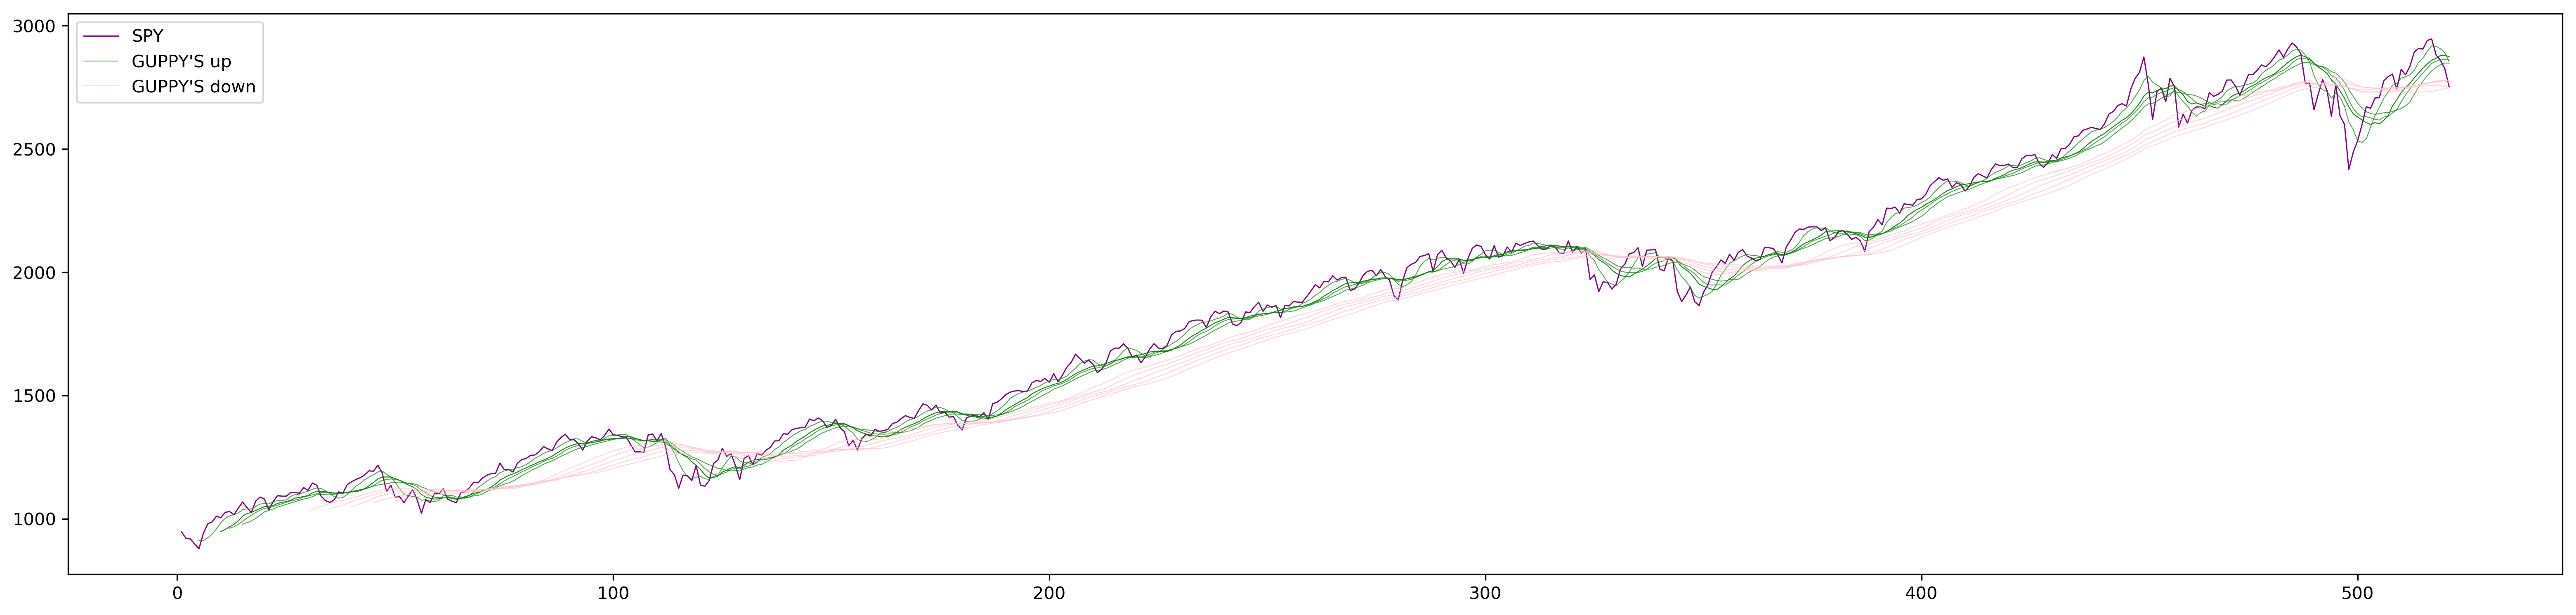

In [183]:
plt.figure(figsize=(26,6),dpi=300)
plt.plot(dataset_1W['Close'],label = 'SPY',color='purple',lw=0.7)
plt.plot(sma5,label = "GUPPY'S up", color='g', alpha=0.7,lw=0.5)
plt.plot(sma10, color='g', alpha=0.7,lw=0.5)
plt.plot(sma10, color='g', alpha=0.7,lw=0.5)
plt.plot(sma12, color='g', alpha=0.7,lw=0.5)
plt.plot(sma15, color='g', alpha=0.7,lw=0.5)
plt.plot(sma30, label = "GUPPY'S down", color='pink', alpha=0.7,lw=0.5)
plt.plot(sma35, color='pink', alpha=0.7,lw=0.5)
plt.plot(sma40, color='pink', alpha=0.7,lw=0.5)
plt.plot(sma45, color='pink', alpha=0.7,lw=0.5)
plt.plot(sma50, color='pink', alpha=0.7,lw=0.5)
plt.legend()
plt.show()

In [184]:
delta5_8.shape,delta8_10.shape, delta10_12.shape, delta12_15.shape, delta15_30 .shape,delta30_35.shape,delta35_40.shape,delta40_45.shape, delta45_50.shape

((521,), (521,), (521,), (521,), (521,), (521,), (521,), (521,), (521,))

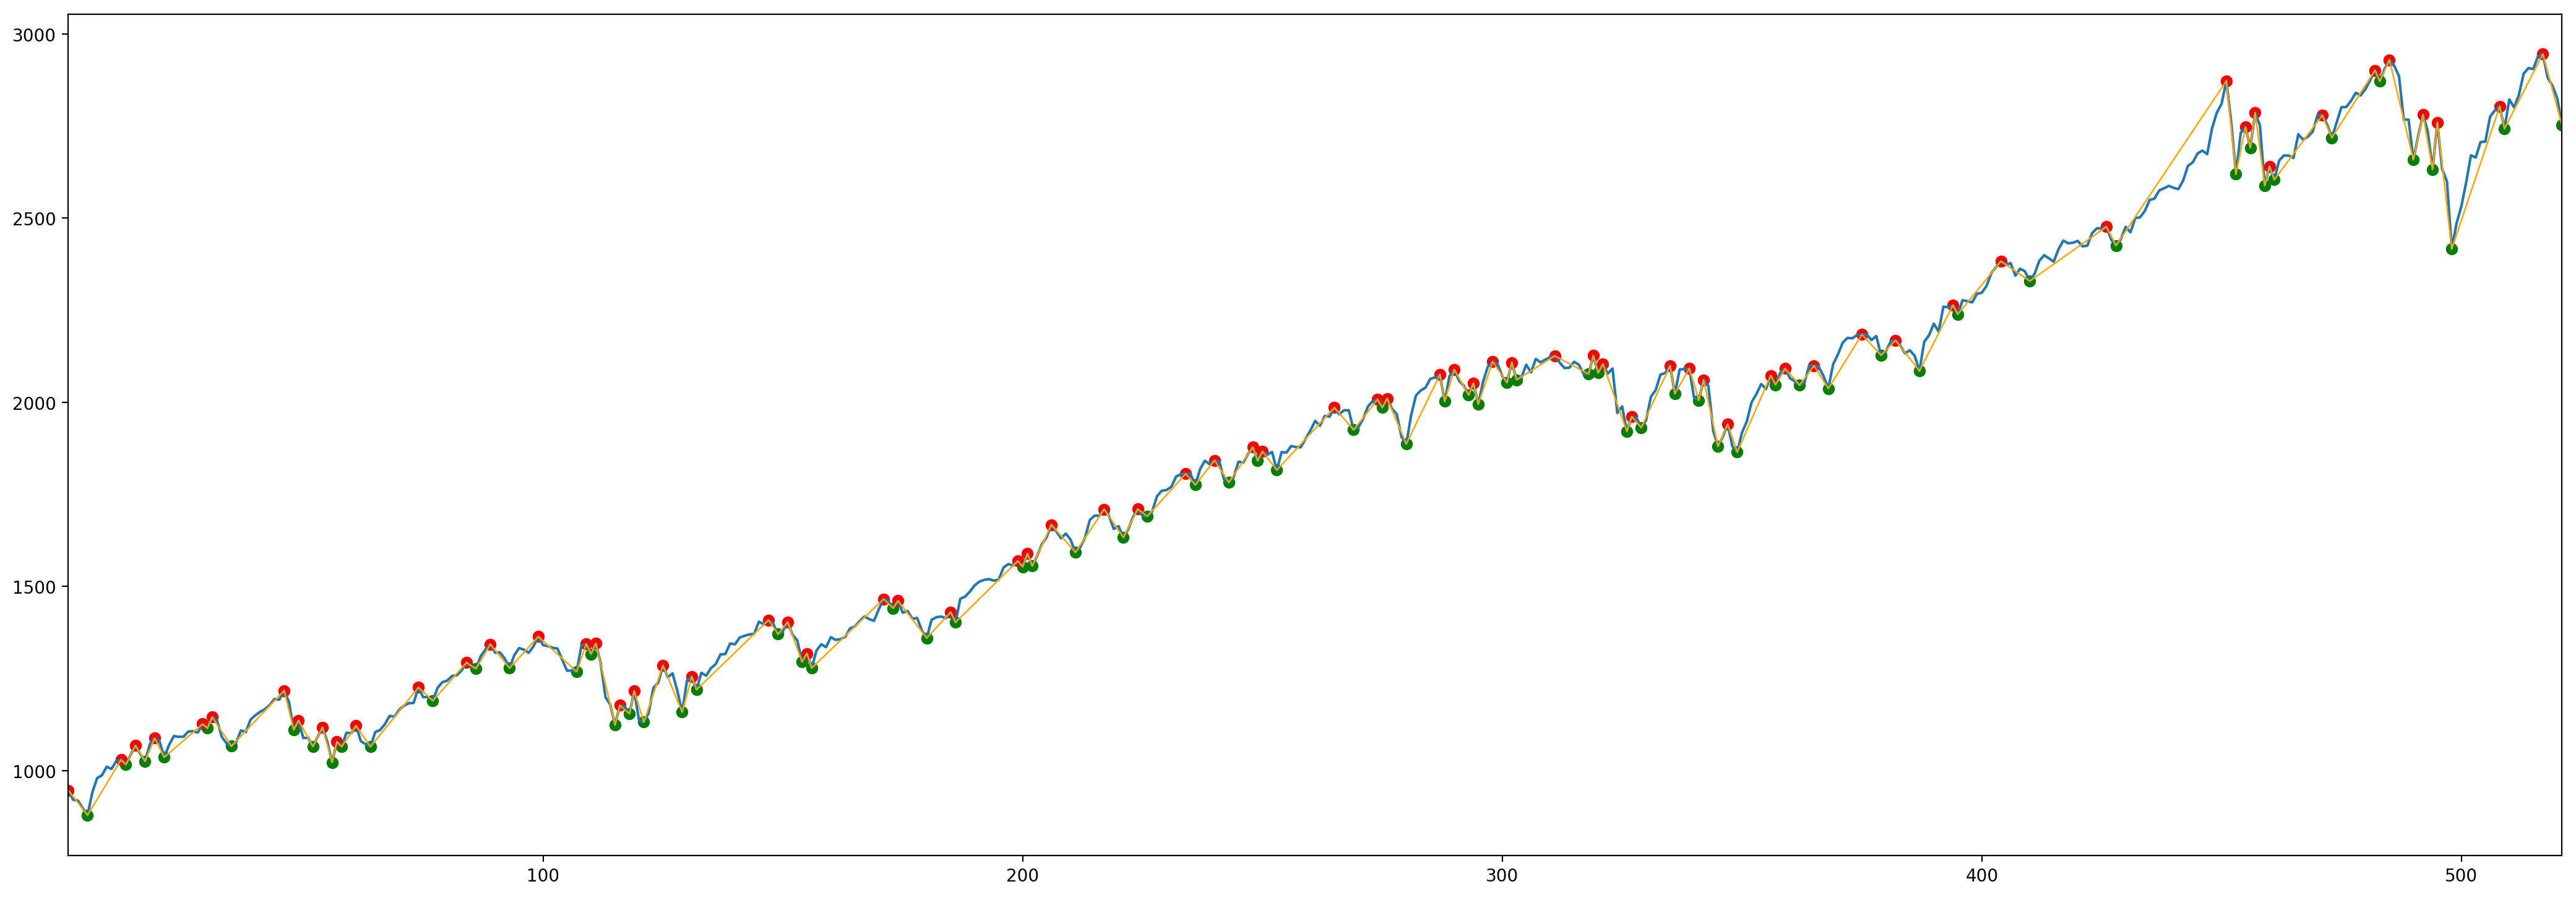

In [185]:
X = dataset_1W['Close']
pivots = peak_valley_pivots(X.values, 0.01, -0.01)
ts_pivots = pd.Series(X, index=X.index)
ts_pivots_up = ts_pivots[pivots == -1]
ts_pivots_down = ts_pivots[pivots == 1]
ts_pivots_all = ts_pivots[pivots!=0]

plt.figure(figsize=(26,9),dpi=200)
X.plot()
#ts_pivots_up.plot(style='g-o',lw=0.8,alpha=0.8)
ts_pivots_all.plot(color='orange',lw=0.9)
plt.scatter(x=ts_pivots_up.index,y=ts_pivots_up[:],c='g')
plt.scatter(x=ts_pivots_down.index,y=ts_pivots_down[:],c='r')
plt.show()
plt.close()

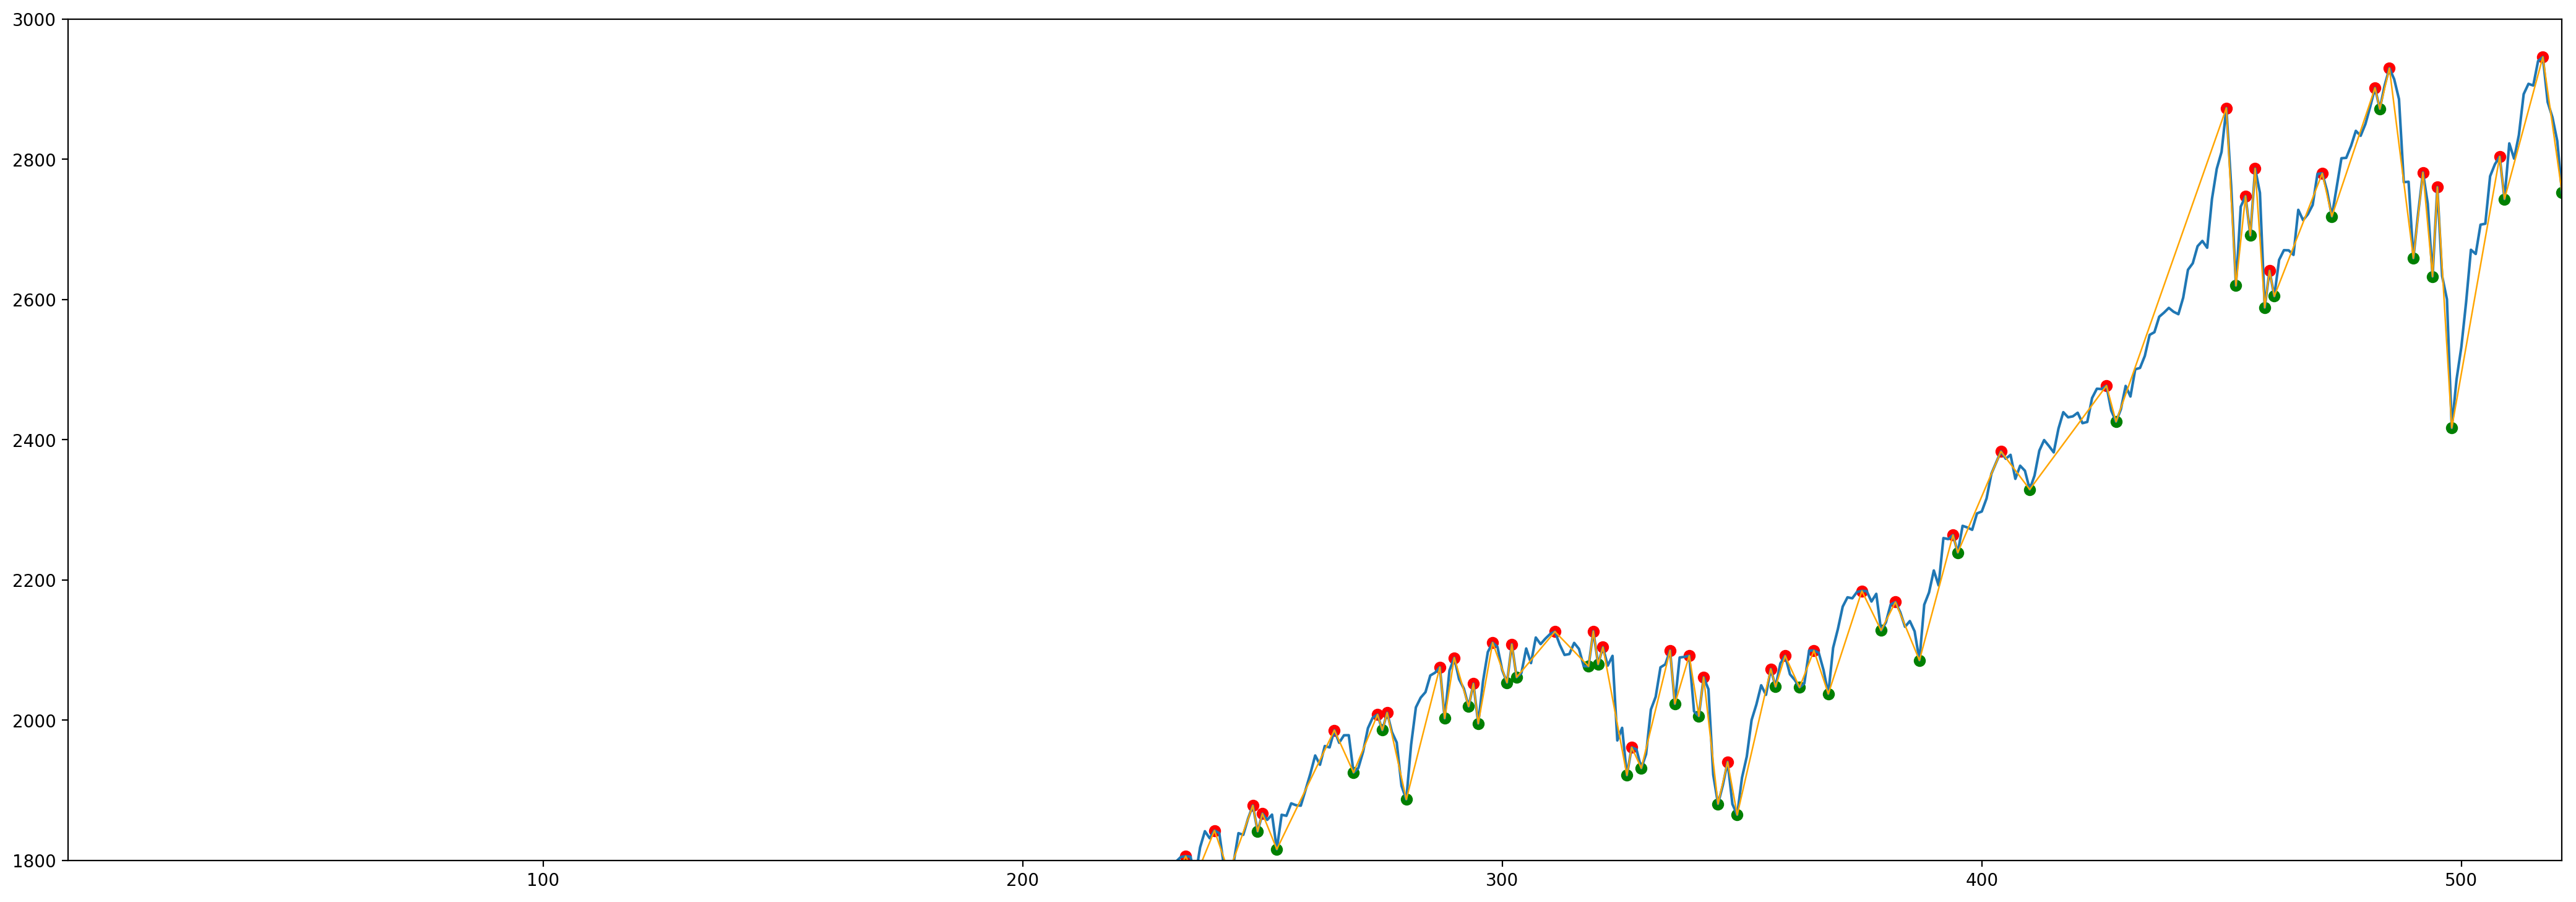

In [186]:
plt.figure(figsize=(26,9),dpi=200)
plt.xlim((400,600))
plt.ylim((1800,3000))
plt.plot(X)
#ts_pivots_up.plot(style='g-o',lw=0.8,alpha=0.8)
ts_pivots_all.plot(color='orange',lw=0.9)
plt.scatter(x=ts_pivots_up.index,y=ts_pivots_up[:],c='g')
plt.scatter(x=ts_pivots_down.index,y=ts_pivots_down[:],c='r')
plt.show()
plt.close()

peak = []
valley = []

for i in range(0,dataset_1W.shape[0]):
    if pivots[i] == 1:
        peak.append(pivots[i])
        valley.append(0)
    elif pivots[i] == -1:
        peak.append(0)
        valley.append(pivots[i])
    else:
        peak.append(0)
        valley.append(0)

In [187]:
len(pivots)

521

In [188]:
bbdelta = upper - middle
price_bolup = dataset_1W['Close'] - lower
price_bolow = dataset_1W['Close'] - upper

In [189]:
ts_pivots.shape,bbdelta.shape,price_bolup.shape,price_bolow.shape,dataset_1W.shape[0]

((521,), (521,), (521,), (521,), 521)

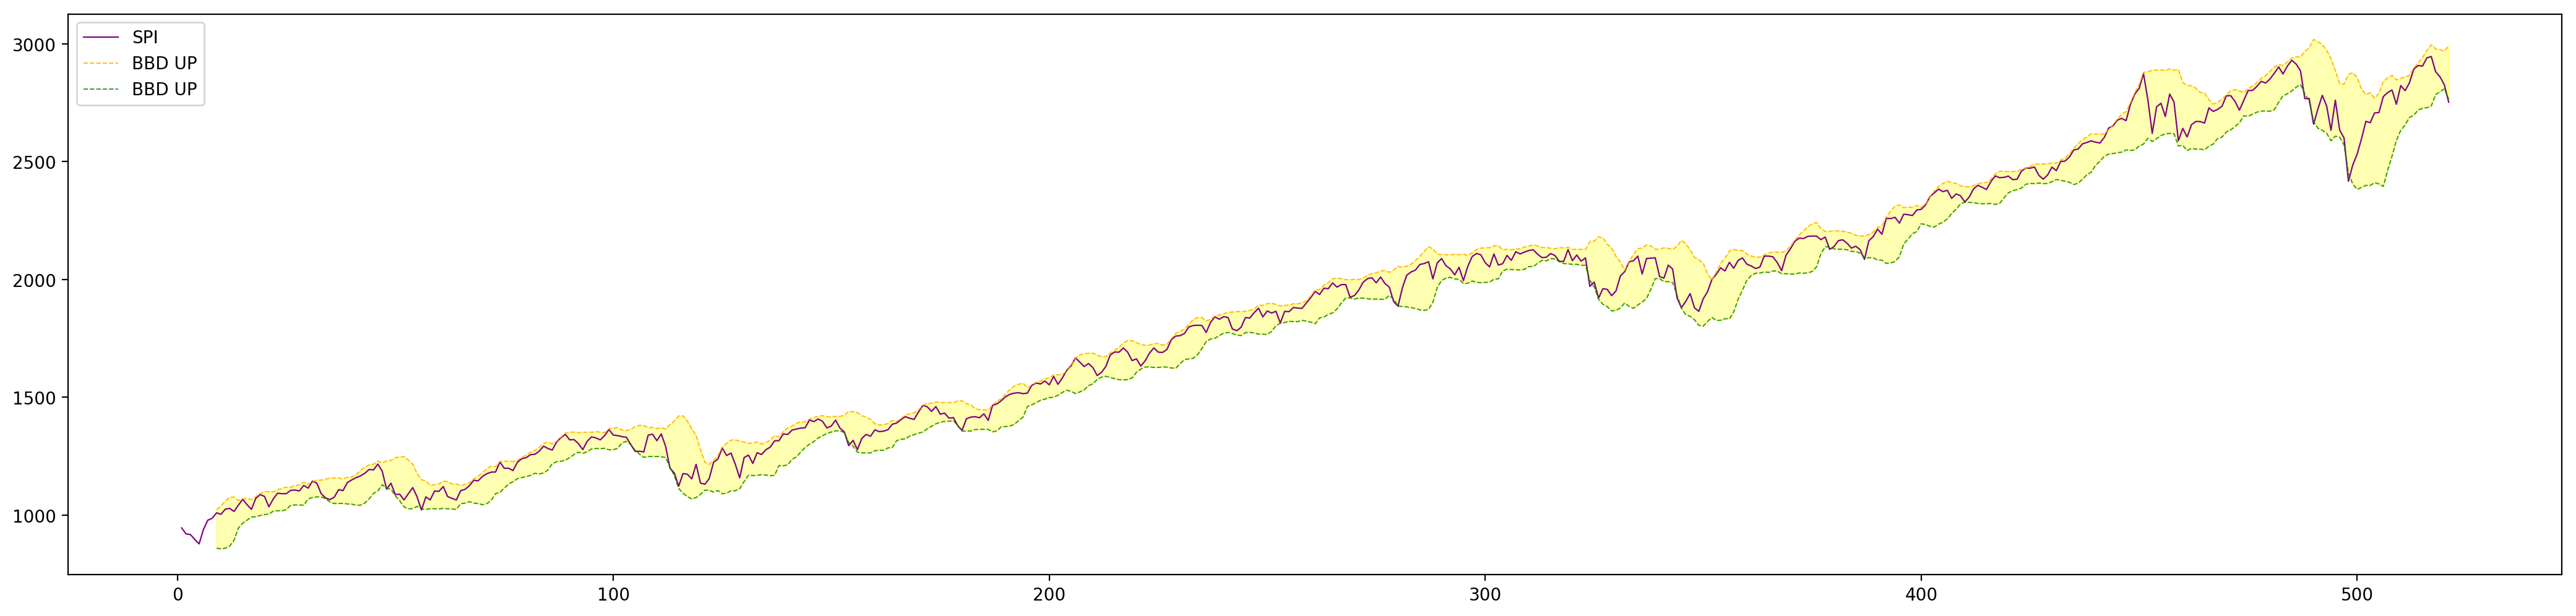

In [190]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(dataset_1W['Close'],label = 'SPI',color='purple',lw=0.8)
plt.plot(upper,label='BBD UP',color = 'orange',linestyle='--',lw=0.7,alpha=0.8)
plt.plot(lower,label='BBD UP',color = 'green',linestyle='--',lw=0.7,alpha=0.8)
plt.fill_between(x=dataset_1W.index,y1=upper,y2=lower,color='yellow',alpha=0.3)
plt.legend()
plt.show()

In [191]:
rsi[20]

66.35285768874729

In [192]:
rsi25_list = []
rsi75_list = []
for i in range(0,dataset_1W.shape[0]):
    try:
        rsi75_list.append(75 - rsi[i])
        rsi25_list.append(rsi[i] - 25)
    except:
        rsi75_list.append(0)
        rsi25_list.append(0)

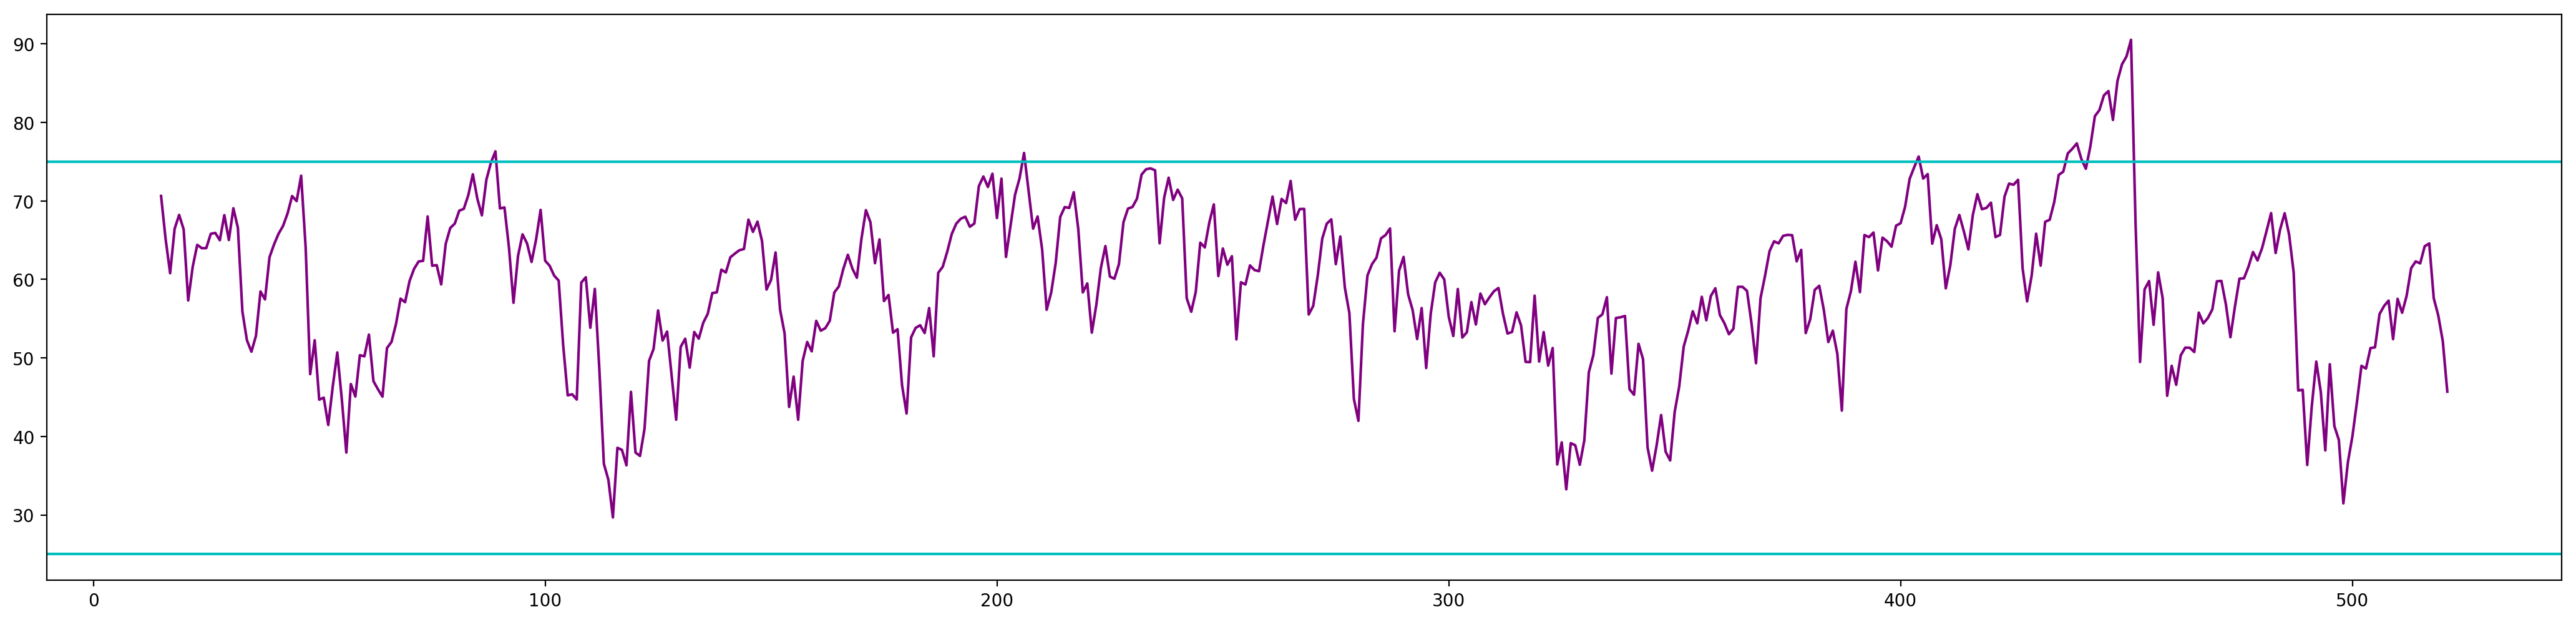

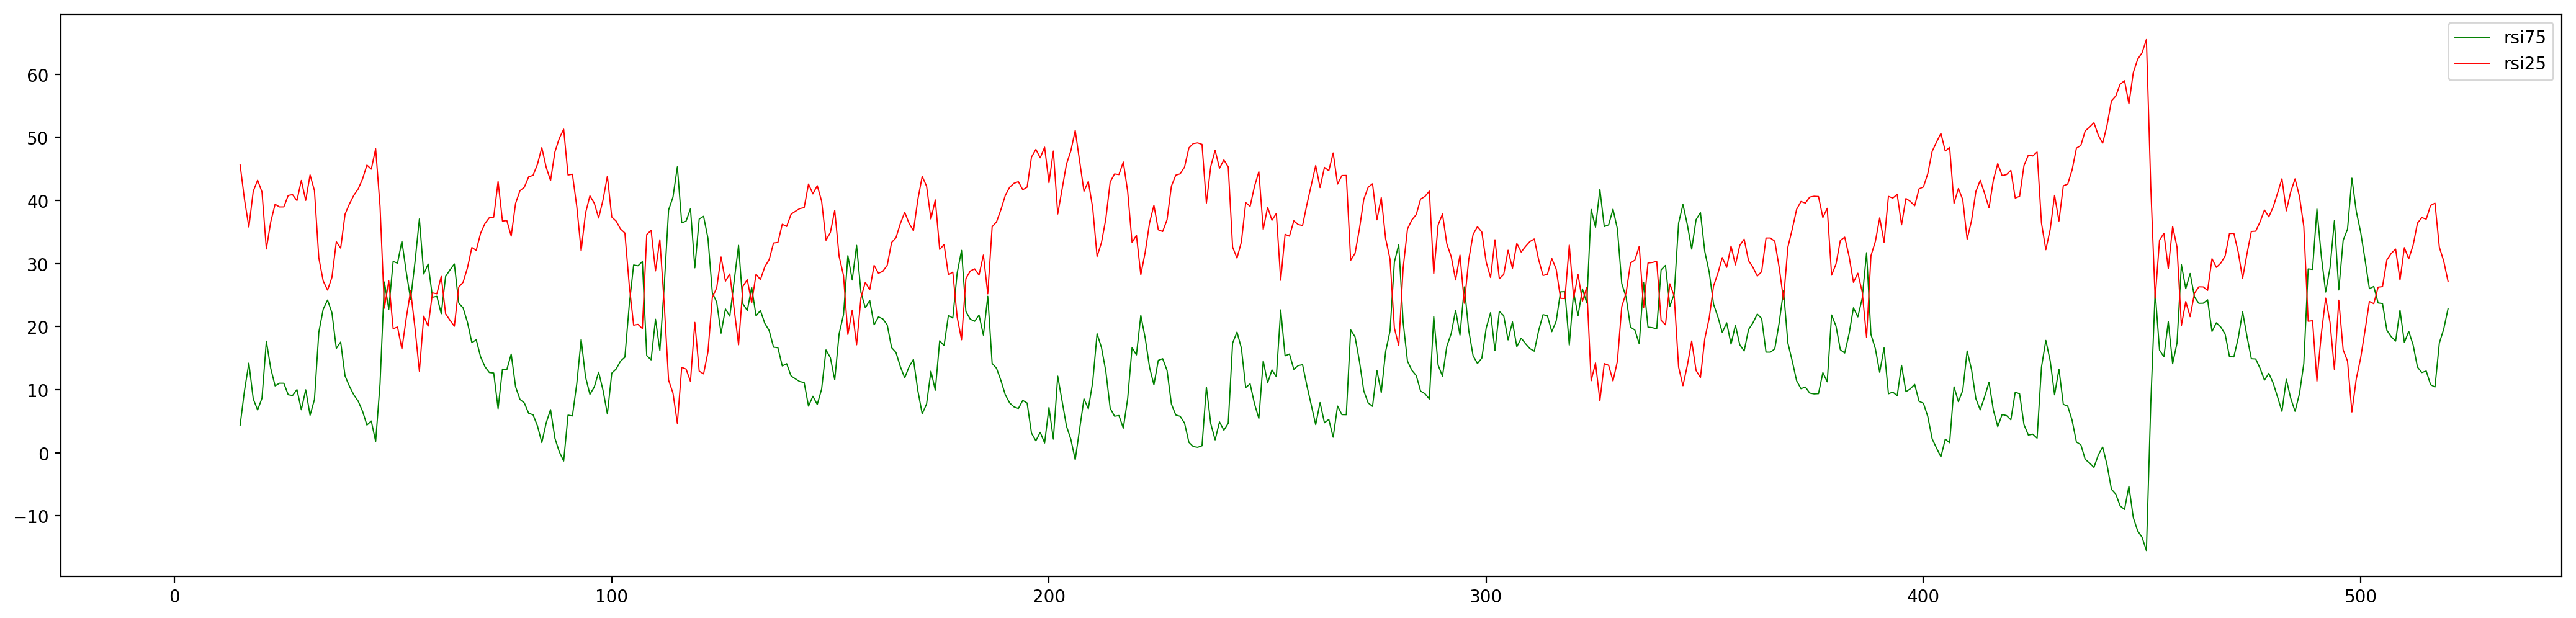

In [193]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(rsi,label = 'RSI',color='purple')
plt.axhline(y=75,color='c')
plt.axhline(y=25,color='c')

plt.figure(figsize=(26,6),dpi=200)
plt.plot(rsi75_list,label='rsi75',color='green',lw=0.7)
plt.plot(rsi25_list,label='rsi25',color='r',lw=0.7)

plt.legend()
plt.show()

In [194]:
varop_spy = dataset_1W['Open'] - dataset_1W['Close']
varhl_spy = dataset_1W['High'] - dataset_1W['Low']

In [195]:
varop_spy.shape,varhl_spy.shape

((521,), (521,))

In [196]:
dataset_1W['Varop_Spy'] = varop_spy
dataset_1W['Varhl_spy'] = varhl_spy
dataset_1W['RSI'] = rsi
dataset_1W['75 - RSI'] = np.array(rsi75_list)
dataset_1W['RSI - 25'] = np.array(rsi25_list)

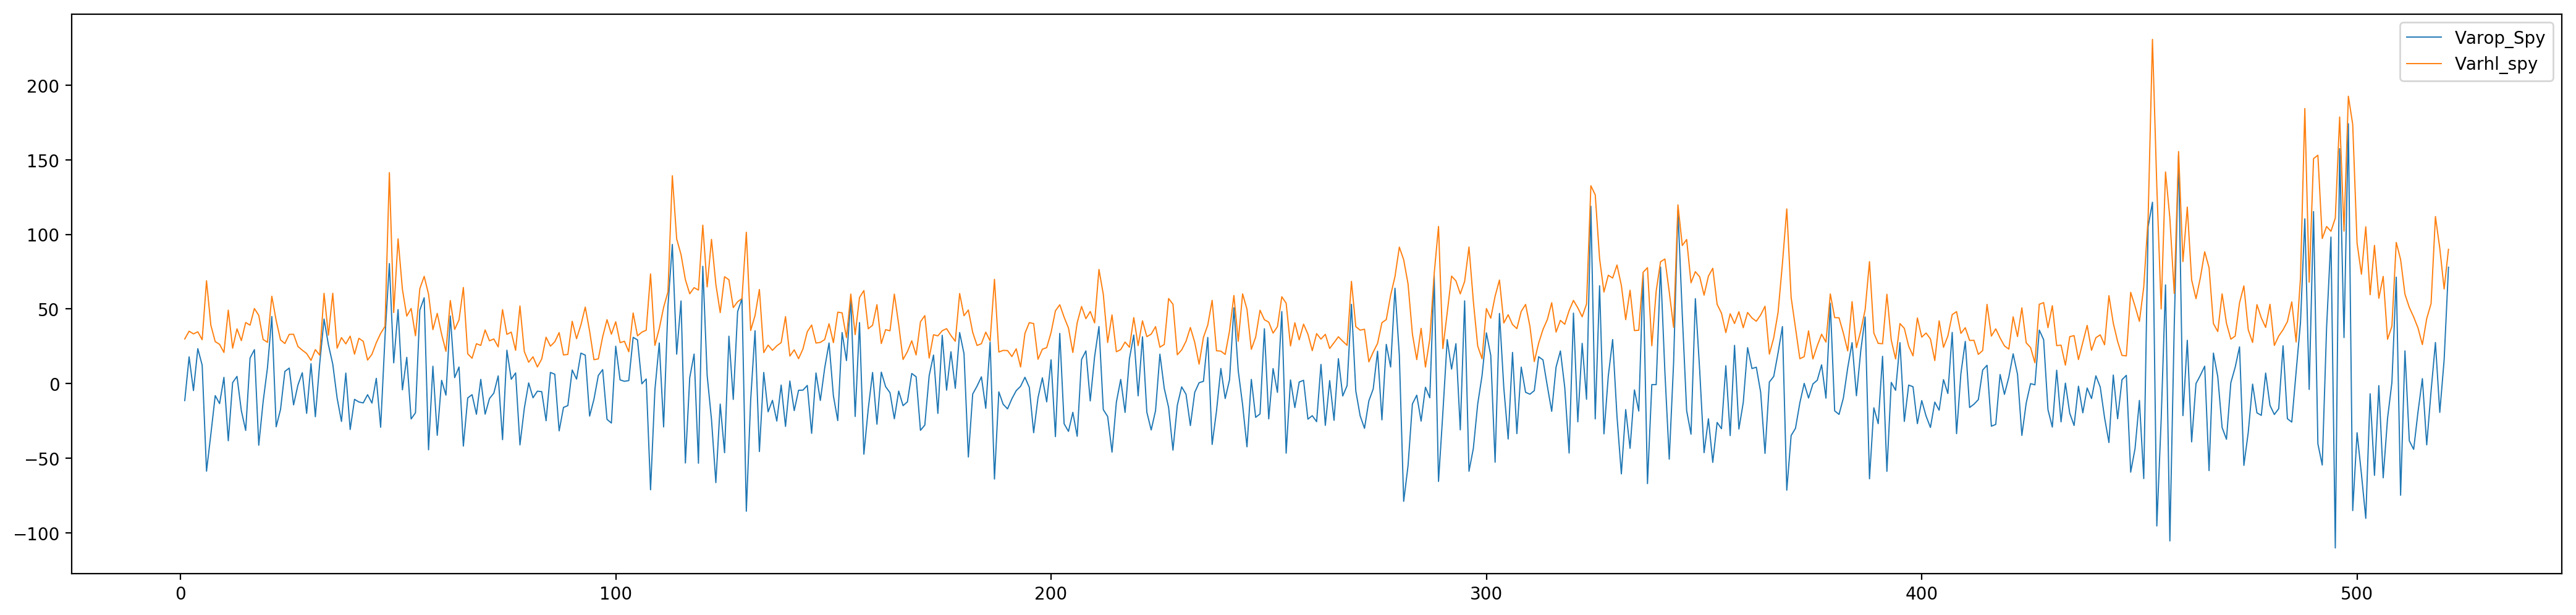

In [197]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(dataset_1W['Varop_Spy'],label = 'Varop_Spy',lw=0.7)
plt.plot(dataset_1W['Varhl_spy'],label = 'Varhl_spy',lw=0.7)
plt.legend()


In [198]:
dataset_1W.tail()

Date     Open     High      Low    Close  Varop_Spy  Varhl_spy  \
517  20190503  2940.58  2954.13  2900.50  2945.64      -5.06      53.63   
518  20190510  2908.89  2937.32  2825.39  2881.40      27.49     111.93   
519  20190517  2840.19  2892.15  2801.43  2859.53     -19.34      90.72   
520  20190524  2841.94  2868.88  2805.49  2826.06      15.88      63.39   
521  20190531  2830.03  2840.51  2750.52  2752.06      77.97      89.99   

           RSI   75 - RSI   RSI - 25  
517  64.572863  10.788182  39.211818  
518  57.594248  10.427137  39.572863  
519  55.399168  17.405752  32.594248  
520  52.124943  19.600832  30.399168  
521  45.694644  22.875057  27.124943

In [199]:
dataset_1W['BBD_Delta_Up'] = bbdelta

dataset_1W.tail()

Date     Open     High      Low    Close  Varop_Spy  Varhl_spy  \
517  20190503  2940.58  2954.13  2900.50  2945.64      -5.06      53.63   
518  20190510  2908.89  2937.32  2825.39  2881.40      27.49     111.93   
519  20190517  2840.19  2892.15  2801.43  2859.53     -19.34      90.72   
520  20190524  2841.94  2868.88  2805.49  2826.06      15.88      63.39   
521  20190531  2830.03  2840.51  2750.52  2752.06      77.97      89.99   

           RSI   75 - RSI   RSI - 25  BBD_Delta_Up  
517  64.572863  10.788182  39.211818    129.991941  
518  57.594248  10.427137  39.572863     96.840492  
519  55.399168  17.405752  32.594248     89.390154  
520  52.124943  19.600832  30.399168     79.629040  
521  45.694644  22.875057  27.124943    113.767434

In [200]:
dataset_1W['delta5_8'] = delta5_8
dataset_1W['delta8_10'] = delta8_10
dataset_1W['delta10_12'] = delta10_12
dataset_1W['delta12_15'] = delta12_15
dataset_1W['delta15_30'] = delta15_30
dataset_1W['delta30_35'] = delta30_35
dataset_1W['delta35_40'] = delta35_40
dataset_1W['delta40_45'] = delta40_45
dataset_1W['delta45_50'] = delta45_50

In [201]:
dataset_1W.tail()

Date     Open     High      Low    Close  Varop_Spy  Varhl_spy  \
517  20190503  2940.58  2954.13  2900.50  2945.64      -5.06      53.63   
518  20190510  2908.89  2937.32  2825.39  2881.40      27.49     111.93   
519  20190517  2840.19  2892.15  2801.43  2859.53     -19.34      90.72   
520  20190524  2841.94  2868.88  2805.49  2826.06      15.88      63.39   
521  20190531  2830.03  2840.51  2750.52  2752.06      77.97      89.99   

           RSI   75 - RSI   RSI - 25  BBD_Delta_Up  delta5_8  delta8_10  \
517  64.572863  10.788182  39.211818    129.991941  37.10375   21.53125   
518  57.594248  10.427137  39.572863     96.840492  27.47075   21.12525   
519  55.399168  17.405752  32.594248     89.390154  10.54225   16.83175   
520  52.124943  19.600832  30.399168     79.629040  -4.20925   15.43125   
521  45.694644  22.875057  27.124943    113.767434 -24.18825    2.71125   

     delta10_12  delta12_15  delta15_30  delta30_35  delta35_40  delta40_45  \
517   12.561667   30.777333   82.714333  -23.960619  -12.822714   -1.088333   
518   11.516000   25.151333   93.348000  -20.429333  -13.571250   -3.684972   
519   17.590333   20.523000  100.489667  -16.072429  -15.526071   -5.244500   
520   16.084167   14.508500  102.789333   -7.533143  -17.884607   -6.396250   
521   10.470000   16.827000  100.253333   -1.940190  -19.445143   -8.356000   

     delta45_50  
517    1.741933  
518    2.163422  
519    1.881000  
520    1.490400  
521    0.936400

In [202]:
len(peak),len(valley),len(ts_pivots)

(521, 521, 521)

In [203]:
modes = pivots_to_modes(pivots)
pd.Series(X).pct_change().groupby(modes).describe().unstack()

count  -1    183.000000
        1    337.000000
mean   -1     -0.016355
        1      0.012358
std    -1      0.016191
        1      0.013358
min    -1     -0.071888
        1     -0.009933
25%    -1     -0.022353
        1      0.002533
50%    -1     -0.012487
        1      0.009998
75%    -1     -0.005242
        1      0.019900
max    -1      0.009123
        1      0.073886
dtype: float64

In [204]:
compute_segment_returns(X, pivots).sum()

0.0

In [205]:

max_drawdown(np.array(X))

0.17606207053336362

In [206]:
dataset_1W['Peaks'] = abs(np.array(peak))
dataset_1W['Valley'] = abs(np.array(valley))
dataset_1W.tail()

Date     Open     High      Low    Close  Varop_Spy  Varhl_spy  \
517  20190503  2940.58  2954.13  2900.50  2945.64      -5.06      53.63   
518  20190510  2908.89  2937.32  2825.39  2881.40      27.49     111.93   
519  20190517  2840.19  2892.15  2801.43  2859.53     -19.34      90.72   
520  20190524  2841.94  2868.88  2805.49  2826.06      15.88      63.39   
521  20190531  2830.03  2840.51  2750.52  2752.06      77.97      89.99   

           RSI   75 - RSI   RSI - 25  ...  delta8_10  delta10_12  delta12_15  \
517  64.572863  10.788182  39.211818  ...   21.53125   12.561667   30.777333   
518  57.594248  10.427137  39.572863  ...   21.12525   11.516000   25.151333   
519  55.399168  17.405752  32.594248  ...   16.83175   17.590333   20.523000   
520  52.124943  19.600832  30.399168  ...   15.43125   16.084167   14.508500   
521  45.694644  22.875057  27.124943  ...    2.71125   10.470000   16.827000   

     delta15_30  delta30_35  delta35_40  delta40_45  delta45_50  Peaks  Valley  
517   82.714333  -23.960619  -12.822714   -1.088333    1.741933      1       0  
518   93.348000  -20.429333  -13.571250   -3.684972    2.163422      0       0  
519  100.489667  -16.072429  -15.526071   -5.244500    1.881000      0       0  
520  102.789333   -7.533143  -17.884607   -6.396250    1.490400      0       0  
521  100.253333   -1.940190  -19.445143   -8.356000    0.936400      0       1  

[5 rows x 22 columns]

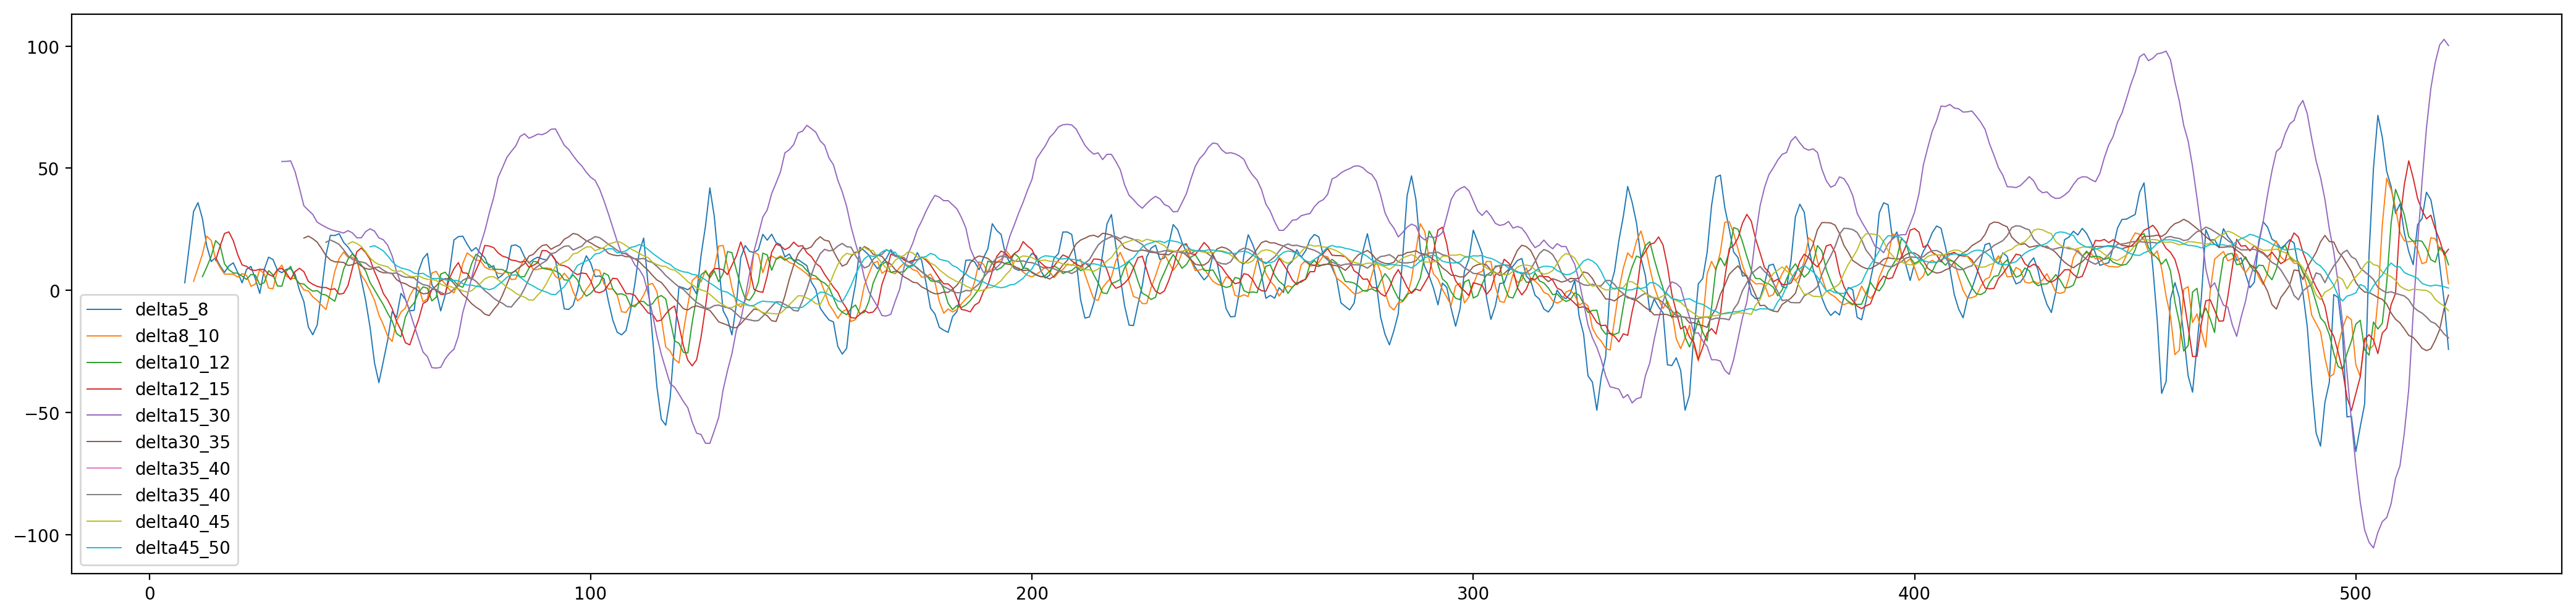

In [207]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(dataset_1W['delta5_8'],label = 'delta5_8',lw=0.7)
plt.plot(dataset_1W['delta8_10'],label = 'delta8_10',lw=0.7)
plt.plot(dataset_1W['delta10_12'],label = 'delta10_12',lw=0.7)
plt.plot(dataset_1W['delta12_15'],label = 'delta12_15',lw=0.7)
plt.plot(dataset_1W['delta15_30'],label = 'delta15_30',lw=0.7)
plt.plot(dataset_1W['delta30_35'],label = 'delta30_35',lw=0.7)
plt.plot(dataset_1W['delta35_40'],label = 'delta35_40',lw=0.7)
plt.plot(dataset_1W['delta35_40'],label = 'delta35_40',lw=0.7)
plt.plot(dataset_1W['delta40_45'],label = 'delta40_45',lw=0.7)
plt.plot(dataset_1W['delta45_50'],label = 'delta45_50',lw=0.7)
plt.legend()

delta_1_2 = []
delta_1_3 =[]
delta_2_3 = []

delta_1_2.append(0)
delta_1_3.append(0)

delta_2_3.append(0)



for i in range(1,dataset_1D.shape[0]-1):
    delta_1_2.append(dataset_1D.iloc[-i,4] - dataset_1D.iloc[-i-1,4])
        
for i in range(1,dataset_1D.shape[0]-2):
     delta_1_3.append(dataset_1D.iloc[-i,4] - dataset_1D.iloc[-i-2,4])
    
for i in range(1,dataset_1D.shape[0]-2):
     delta_2_3.append(dataset_1D.iloc[-i-1,4] - dataset_1D.iloc[-i-2,4])

delta_1_2.append(0)
delta_1_3.append(0)
delta_2_3.append(0)
delta_1_3.append(0)
delta_2_3.append(0)


len(delta_1_2),len(delta_1_3),len(delta_2_3)

dataset_1D['delta_1_2'] = delta_1_2
dataset_1D['delta_2_3'] = delta_2_3
dataset_1D['delta_1_3'] = delta_1_3

In [208]:
dataset_1W.tail()

Date     Open     High      Low    Close  Varop_Spy  Varhl_spy  \
517  20190503  2940.58  2954.13  2900.50  2945.64      -5.06      53.63   
518  20190510  2908.89  2937.32  2825.39  2881.40      27.49     111.93   
519  20190517  2840.19  2892.15  2801.43  2859.53     -19.34      90.72   
520  20190524  2841.94  2868.88  2805.49  2826.06      15.88      63.39   
521  20190531  2830.03  2840.51  2750.52  2752.06      77.97      89.99   

           RSI   75 - RSI   RSI - 25  ...  delta8_10  delta10_12  delta12_15  \
517  64.572863  10.788182  39.211818  ...   21.53125   12.561667   30.777333   
518  57.594248  10.427137  39.572863  ...   21.12525   11.516000   25.151333   
519  55.399168  17.405752  32.594248  ...   16.83175   17.590333   20.523000   
520  52.124943  19.600832  30.399168  ...   15.43125   16.084167   14.508500   
521  45.694644  22.875057  27.124943  ...    2.71125   10.470000   16.827000   

     delta15_30  delta30_35  delta35_40  delta40_45  delta45_50  Peaks  Valley  
517   82.714333  -23.960619  -12.822714   -1.088333    1.741933      1       0  
518   93.348000  -20.429333  -13.571250   -3.684972    2.163422      0       0  
519  100.489667  -16.072429  -15.526071   -5.244500    1.881000      0       0  
520  102.789333   -7.533143  -17.884607   -6.396250    1.490400      0       0  
521  100.253333   -1.940190  -19.445143   -8.356000    0.936400      0       1  

[5 rows x 22 columns]

In [209]:
tsf = talib.TSF(dataset_1W['Close'],timeperiod=14)
type(tsf),len(tsf)

(pandas.core.series.Series, 521)

In [210]:
delta_tsf = dataset_1W['Close'] - tsf
dataset_1W['delta_tsf'] = tsf
delta_tsf.shape

(521,)

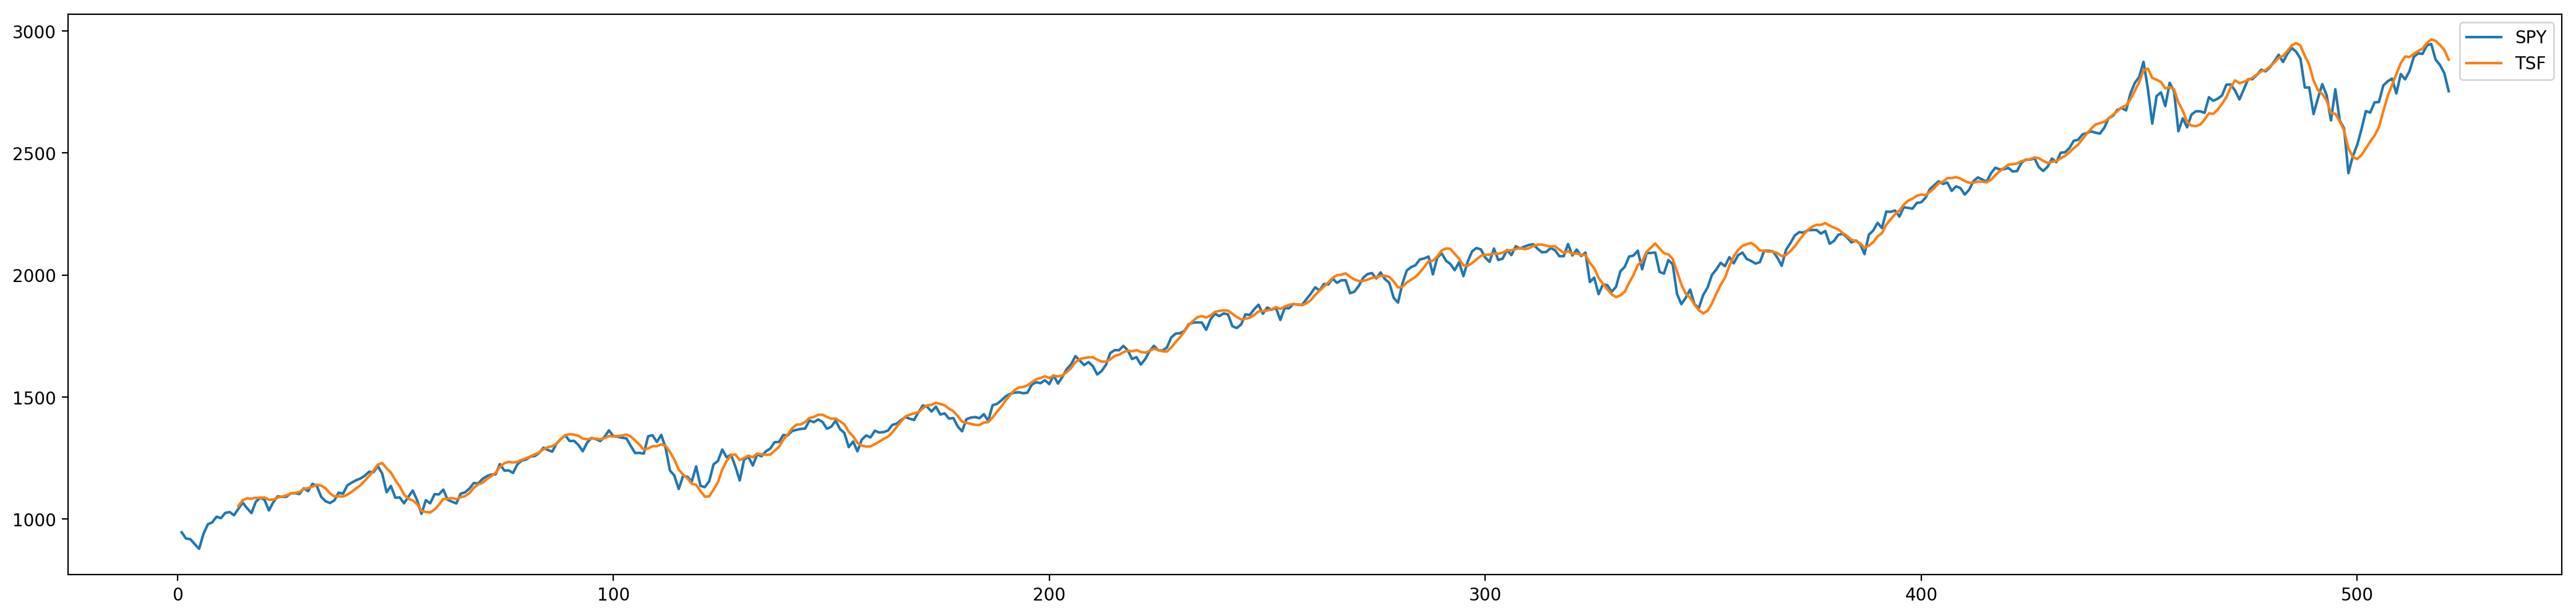

In [211]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(dataset_1W['Close'],label = 'SPY')
#plt.plot(dataset_1D['delta_tsf'],label = 'DELTA TSF SPY')
plt.plot(tsf,label='TSF')
plt.legend()
plt.show()

In [212]:
forosc = []
forosc.append(0)
for i in range(1,dataset_1W.shape[0]):
    try:
        forosc.append((dataset_1W.iloc[i,4] - tsf[i-1])*100/dataset_1W.iloc[i,4])
    except:
        forosc.append(0)
len(forosc),type(forosc)

(521, list)

In [213]:
dataset_1W['Forcast Oscillator'] = (forosc)

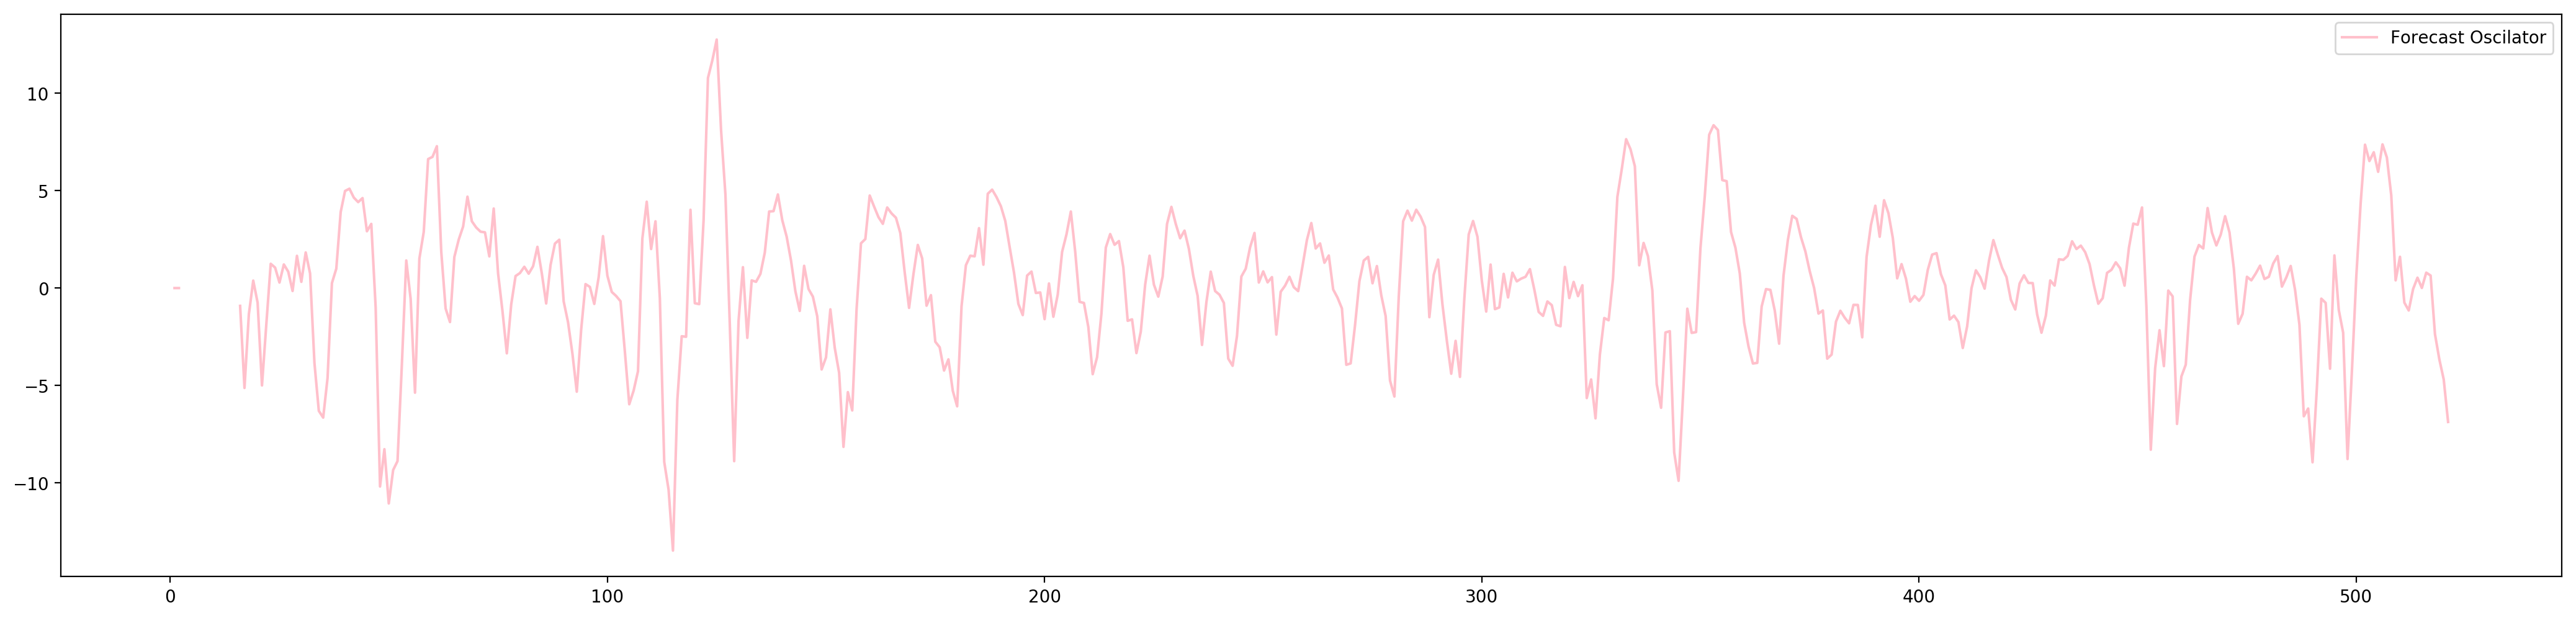

In [214]:
plt.figure(figsize=(26,6),dpi=200)
#plt.plot(dataset_1D['Close'],label = 'SPY')
#plt.plot(dataset_1D['delta_tsf'],label = 'DELTA TSF SPY')
plt.plot(dataset_1W['Forcast Oscillator'],label='Forecast Oscilator',color='pink')
plt.legend()
plt.show()

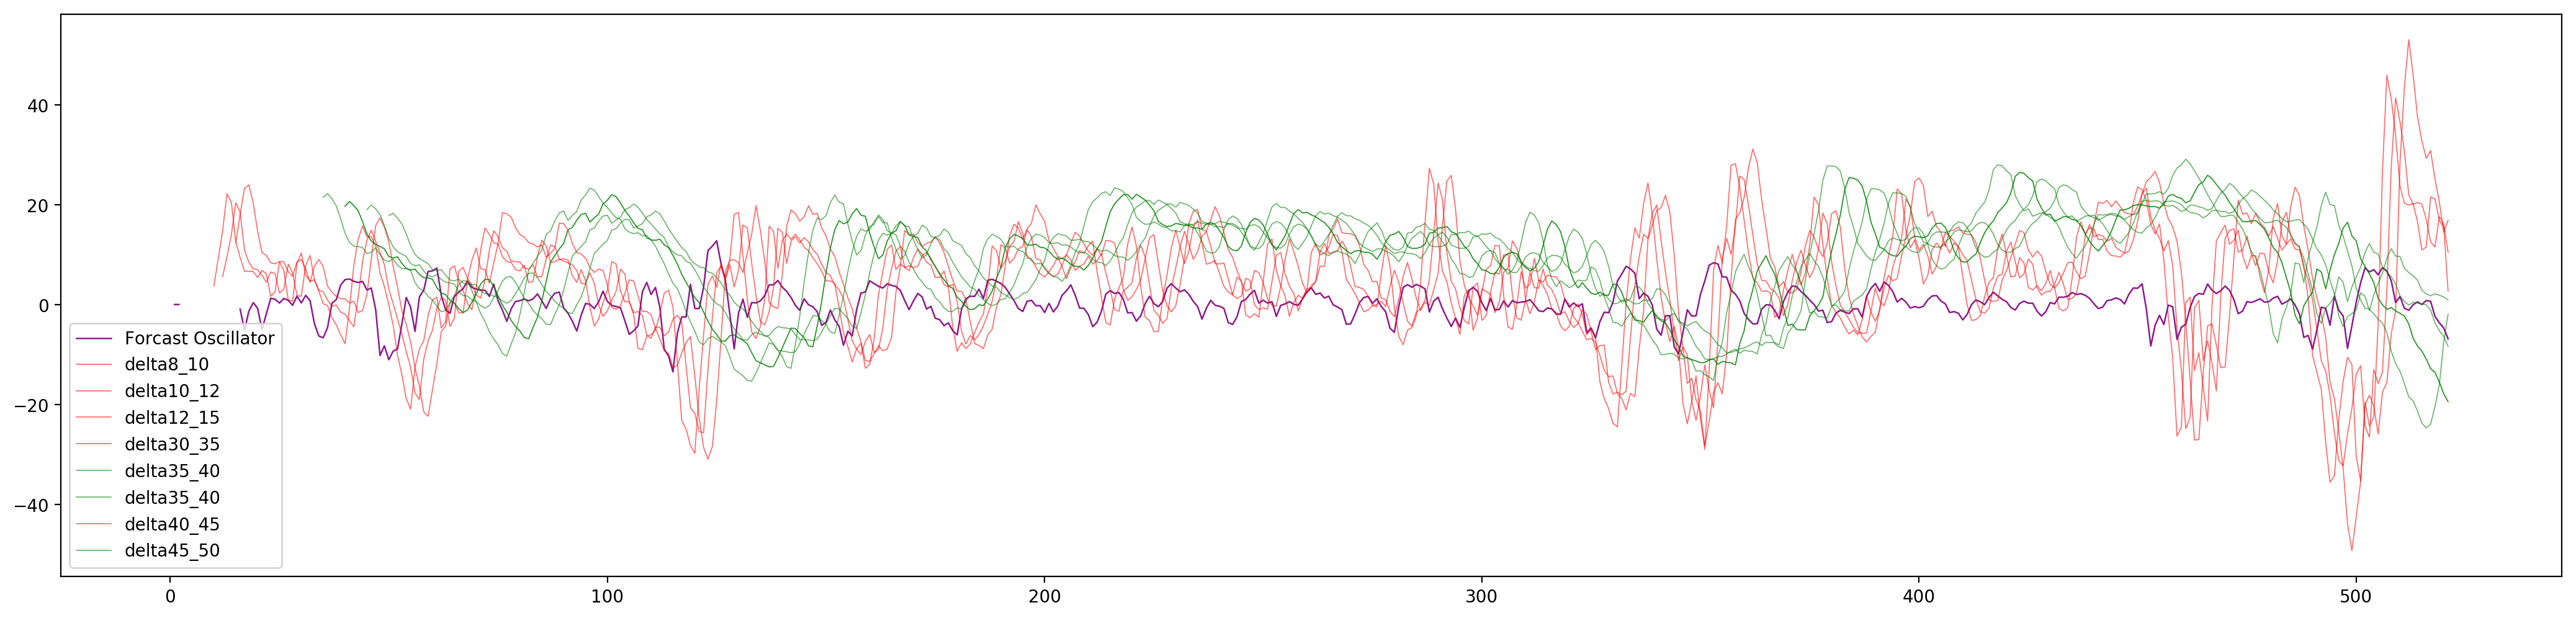

In [215]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(dataset_1W['Forcast Oscillator'],label = 'Forcast Oscillator',lw=0.9,color='purple',alpha=0.9)
#plt.plot(dataset_1W['delta5_8'],label = 'delta5_8',lw=0.6,color='r',alpha=0.6)
plt.plot(dataset_1W['delta8_10'],label = 'delta8_10',lw=0.6,color='r',alpha=0.6)
plt.plot(dataset_1W['delta10_12'],label = 'delta10_12',lw=0.6,color='r',alpha=0.6)
plt.plot(dataset_1W['delta12_15'],label = 'delta12_15',lw=0.6,color='r',alpha=0.6)
#plt.plot(dataset_1W['delta15_30'],label = 'delta15_30',lw=0.6,color='r',alpha=0.6)
plt.plot(dataset_1W['delta30_35'],label = 'delta30_35',lw=0.6,color='g',alpha=0.6)
plt.plot(dataset_1W['delta35_40'],label = 'delta35_40',lw=0.6,color='g',alpha=0.6)
plt.plot(dataset_1W['delta35_40'],label = 'delta35_40',lw=0.6,color='g',alpha=0.6)
plt.plot(dataset_1W['delta40_45'],label = 'delta40_45',lw=0.6,color='g',alpha=0.6)
plt.plot(dataset_1W['delta45_50'],label = 'delta45_50',lw=0.6,color='g',alpha=0.6)
plt.legend()

In [216]:
dataset_1W.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 1 to 521
Data columns (total 24 columns):
Date                  521 non-null int64
Open                  521 non-null float64
High                  521 non-null float64
Low                   521 non-null float64
Close                 521 non-null float64
Varop_Spy             521 non-null float64
Varhl_spy             521 non-null float64
RSI                   507 non-null float64
75 - RSI              507 non-null float64
RSI - 25              507 non-null float64
BBD_Delta_Up          513 non-null float64
delta5_8              514 non-null float64
delta8_10             512 non-null float64
delta10_12            510 non-null float64
delta12_15            507 non-null float64
delta15_30            492 non-null float64
delta30_35            487 non-null float64
delta35_40            482 non-null float64
delta40_45            477 non-null float64
delta45_50            472 non-null float64
Peaks                 521 non-null in

In [217]:
df.head(0)

Empty DataFrame
Columns: [Date, Open, High, Low, Close]
Index: []

In [218]:
target_up = []
target_down = []

for i in range(0,dataset_1W.shape[0]-1):
    
    if (dataset_1W.iloc[i+1,5] * dataset_1W.iloc[i,5]) < 0 :
        if (dataset_1W.iloc[i+1,4] - dataset_1W.iloc[i,4]) > 20 : #or (df.iloc[i+1,4] - df.iloc[i,3]) > 30:
            target_up.append(1)
            target_down.append(0)
        elif (dataset_1W.iloc[i+1,4] - dataset_1W.iloc[i,4]) < -20 : #or (df.iloc[i+1,4] - df.iloc[i,2]) < -30:
            target_up.append(0)
            target_down.append(1)
        else:
            target_up.append(0)
            target_down.append(0)
    else :
        target_up.append(0)
        target_down.append(0) 
        
target_up.append(0)
target_down.append(0)
#target_up.append(0)
#target_down.append(0)
#target_up.append(0)
#target_down.append(0)
#target_up.append(0)
#target_down.append(0)
#target_up.append(0)
#target_down.append(0)



target_up = []
target_down = []

for i in range(0,dataset_1D.shape[0]-5):
    
    if (dataset_1D.iloc[i+1,7]*dataset_1D.iloc[i,7]) < 0 :
    
        if (dataset_1D.iloc[i+5,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] > 0.02 or \
        (dataset_1D.iloc[i+4,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] > 0.03 or \
        (dataset_1D.iloc[i+3,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] > 0.04 or \
        (dataset_1D.iloc[i+2,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] > 0.05 or \
        (dataset_1D.iloc[i+1,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] > 0.06 :
            target_up.append(1)
            target_down.append(0)
        elif (dataset_1D.iloc[i+5,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] < -0.02 or \
        (dataset_1D.iloc[i+4,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] < -0.03 or \
        (dataset_1D.iloc[i+3,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] < -0.04 or \
        (dataset_1D.iloc[i+2,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] < -0.05 or \
        (dataset_1D.iloc[i+1,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] < -0.06 :
            target_up.append(0)
            target_down.append(1)
        else:
            target_up.append(0)
            target_down.append(0)
    else :
        target_up.append(0)
        target_down.append(0) 
        
target_up.append(0)
target_down.append(0)
target_up.append(0)
target_down.append(0)
target_up.append(0)
target_down.append(0)
target_up.append(0)
target_down.append(0)
target_up.append(0)
target_down.append(0)



In [219]:
len(target_up),len(target_down)

(521, 521)

In [220]:
dataset_1W['target_up'] = target_up
dataset_1W['target_down'] = target_down

dataset_1W['target_up'].sum(),dataset_1W['target_down'].sum()

(80, 60)

In [221]:
dataset_1W['target_value'] = dataset_1W['Close']
dataset_1W = dataset_1W.drop(['Open','High','Low','Close'],axis=1)

In [222]:
dataset_1W.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 1 to 521
Data columns (total 23 columns):
Date                  521 non-null int64
Varop_Spy             521 non-null float64
Varhl_spy             521 non-null float64
RSI                   507 non-null float64
75 - RSI              507 non-null float64
RSI - 25              507 non-null float64
BBD_Delta_Up          513 non-null float64
delta5_8              514 non-null float64
delta8_10             512 non-null float64
delta10_12            510 non-null float64
delta12_15            507 non-null float64
delta15_30            492 non-null float64
delta30_35            487 non-null float64
delta35_40            482 non-null float64
delta40_45            477 non-null float64
delta45_50            472 non-null float64
Peaks                 521 non-null int64
Valley                521 non-null int64
delta_tsf             508 non-null float64
Forcast Oscillator    508 non-null float64
target_up             521 non-null int64


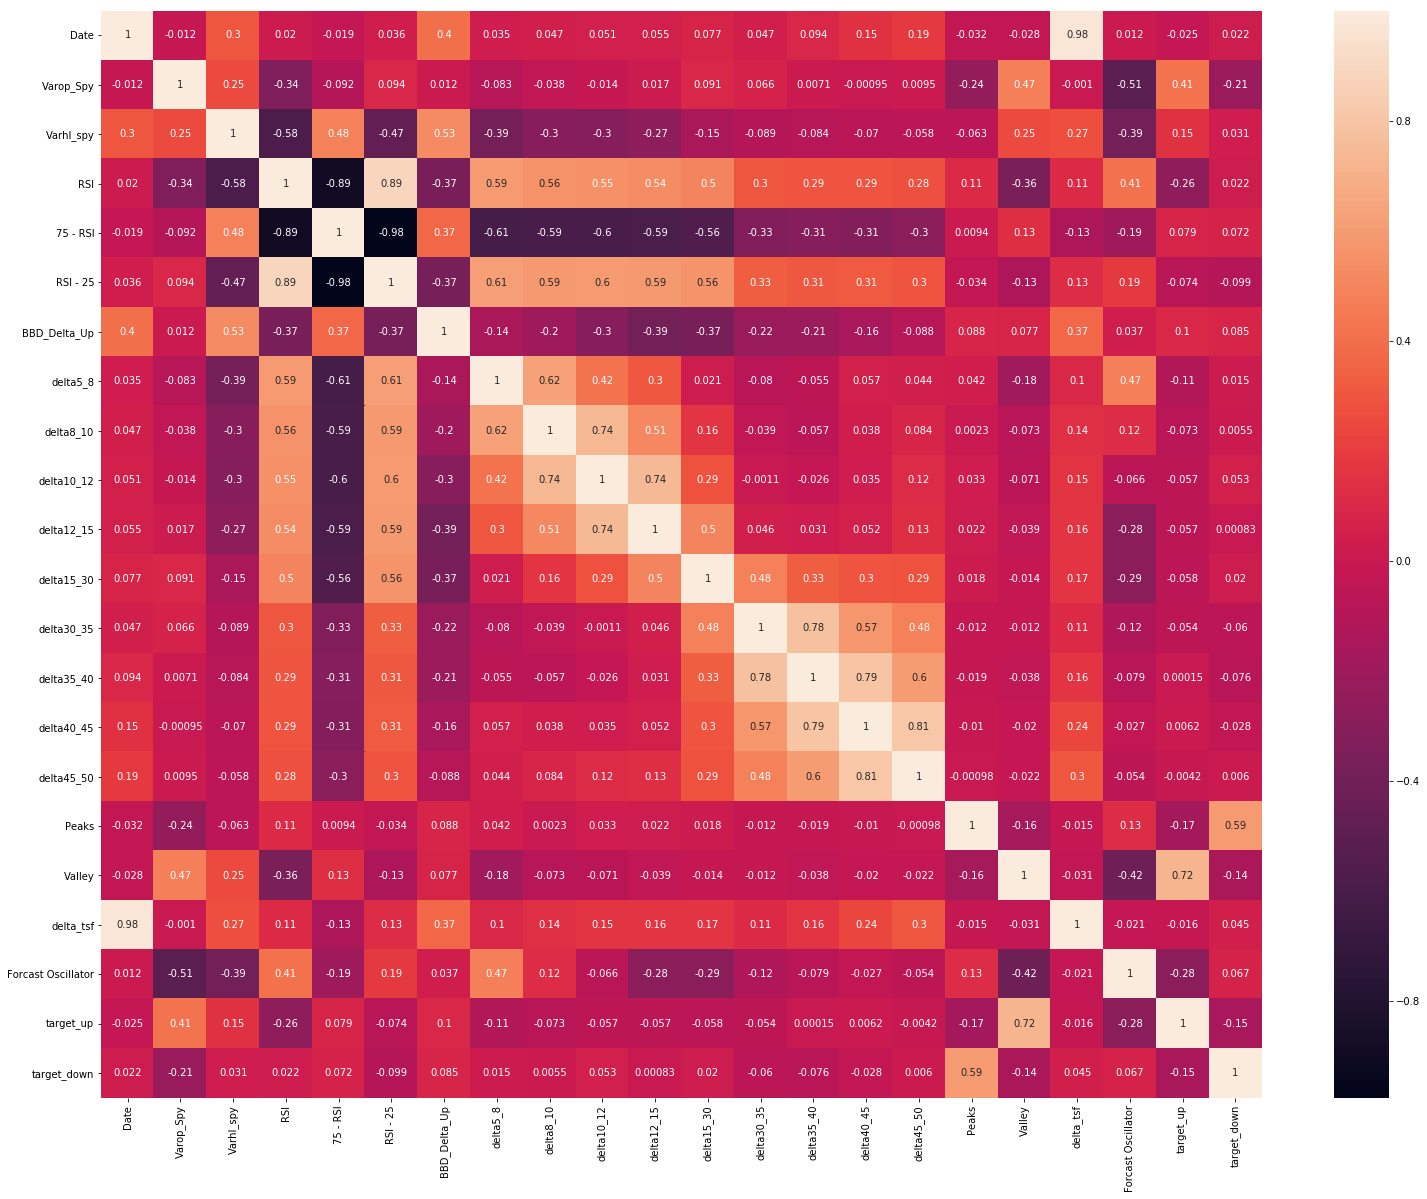

In [223]:
plt.figure(figsize=(26,20))
sns.heatmap(dataset_1W.iloc[:,:-1].corr(),annot=True)
plt.show()

In [224]:
dataset_1W.tail()

Date  Varop_Spy  Varhl_spy        RSI   75 - RSI   RSI - 25  \
517  20190503      -5.06      53.63  64.572863  10.788182  39.211818   
518  20190510      27.49     111.93  57.594248  10.427137  39.572863   
519  20190517     -19.34      90.72  55.399168  17.405752  32.594248   
520  20190524      15.88      63.39  52.124943  19.600832  30.399168   
521  20190531      77.97      89.99  45.694644  22.875057  27.124943   

     BBD_Delta_Up  delta5_8  delta8_10  delta10_12  ...  delta35_40  \
517    129.991941  37.10375   21.53125   12.561667  ...  -12.822714   
518     96.840492  27.47075   21.12525   11.516000  ...  -13.571250   
519     89.390154  10.54225   16.83175   17.590333  ...  -15.526071   
520     79.629040  -4.20925   15.43125   16.084167  ...  -17.884607   
521    113.767434 -24.18825    2.71125   10.470000  ...  -19.445143   

     delta40_45  delta45_50  Peaks  Valley    delta_tsf  Forcast Oscillator  \
517   -1.088333    1.741933      1       0  2964.221648            0.644096   
518   -3.684972    2.163422      0       0  2958.591868           -2.366264   
519   -5.244500    1.881000      0       0  2941.185934           -3.661149   
520   -6.396250    1.490400      0       0  2921.124505           -4.689634   
521   -8.356000    0.936400      0       1  2881.258022           -6.872159   

     target_up  target_down  target_value  
517          0            1       2945.64  
518          0            1       2881.40  
519          0            1       2859.53  
520          0            0       2826.06  
521          0            0       2752.06  

[5 rows x 23 columns]

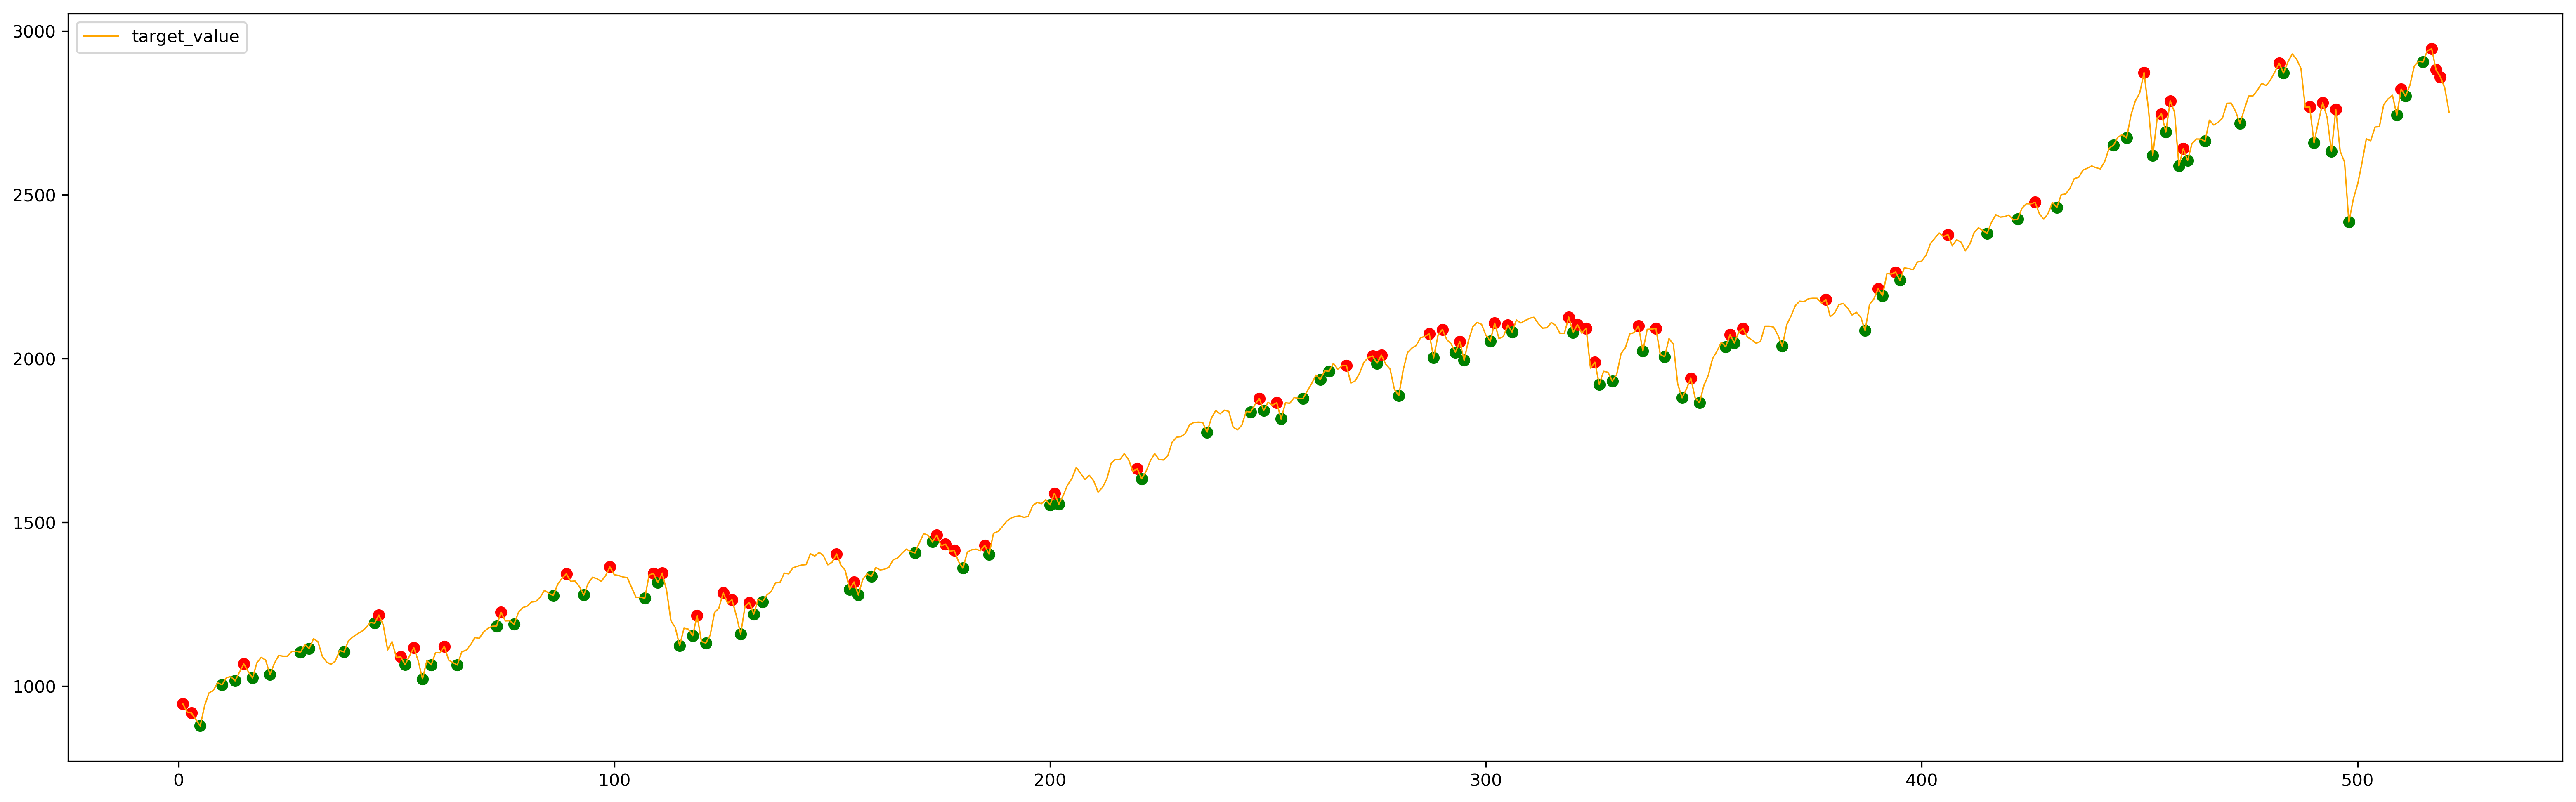

In [225]:
plt.figure(figsize=(26,8),dpi=300)
plt.plot(dataset_1W['target_value'],color='orange',lw=0.8)
for i in range(0,len(dataset_1W)):
    if dataset_1W.iloc[i,-3] == 1:
        plt.scatter(x=dataset_1W.index[i],y=dataset_1W.iloc[i,-1],c='g',marker='o')
    elif dataset_1W.iloc[i,-2] == 1:
        plt.scatter(x=dataset_1W.index[i],y=dataset_1W.iloc[i,-1],c='r',marker='o')
plt.legend()

In [226]:
dataset_1W.to_csv('20190526 data_1W prepared.csv')